In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Yang ini buat baca csv filenya lyd, jadi dimasukin ke dalam dataframe tipe datanya, sejenis tabel gitu

In [2]:
df = pd.read_csv('Raw absensi jan-feb SEP OMK 17 - Rekap.csv')
df.head()

,Nama Panggilan,Nama Lengkap,Kelompok,Kehadiran,Jam kehadiran,Status,Kehadiran.1,Jam kehadiran.1,Status.1,Kehadiran.2,...,Jam kehadiran.8,Status.8,Kehadiran.9,Jam kehadiran.9,Status.9,Kehadiran.10,Jam kehadiran.10,Status.10,TOTAL,PRESTASI
0,NaN,NaN,NaN,28/01/2018 6:15:00,NaN,NaN,30/01/2018 6:15:00,NaN,NaN,6/2/2018 6:15,...,NaN,NaN,25/2/2018 06:15:00,NaN,NaN,27/02/2018 6:15:00,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,MISSED MANUAL,NaN,NaN,CHECKED,NaN,NaN,CHECKED,...,NaN,NaN,CHECKED,NaN,NaN,CHECKED,NaN,NaN,NaN,NaN
2,Esha,Agatha Esha Jesica Setiawan,4.0,1,6:21:50 PM ICT,Telat,1,6:14:40 PM ICT,Hadir,1,...,NaN,Tidak Hadir,1,6:10:53 PM ICT,Hadir,1,6:43:57 PM ICT,Telat,10.0,sangat baik
3,Cardina,Agnes Cardina Novianty Adiputra,8.0,1,8:00:59 PM ICT,Telat Banget,1,6:41:52 PM ICT,Telat,1,...,6:02:24 PM ICT,Hadir,1,6:26:08 PM ICT,Telat,NaN,NaN,Tidak Hadir,9.0,sangat baik
4,Agustinus,Agustinus Hinga Miten,11.0,1,6:06:59 PM ICT,Hadir,1,6:09:43 PM ICT,Hadir,1,...,5:57:30 PM ICT,Hadir,1,5:59:40 PM ICT,Hadir,1,5:45:46 PM ICT,Hadir,11.0,lengkap


Yang ini buat drop baris2 yang ga penting, jadi kalau ga ada nama lengkap paling itu cuma baris untuk rekap dll lah

In [3]:
df = df[~df['Nama Lengkap'].isnull()]

In [4]:
#Buat dapeting kolom2 yang isinya jam kehadiran
attendence_time_columns = [col for col in df.columns if 'Jam' in col]
#Buat select dari tabel itu kolom2 apa yang kita pengen
df = df[['Nama Lengkap', 'Nama Panggilan', 'Kelompok'] + attendence_time_columns]
#liat tabelnya sekarang
df.head()

,Nama Lengkap,Nama Panggilan,Kelompok,Jam kehadiran,Jam kehadiran.1,Jam kehadiran.2,Jam kehadiran.3,Jam kehadiran.4,Jam kehadiran.5,Jam kehadiran.6,Jam kehadiran.7,Jam kehadiran.8,Jam kehadiran.9,Jam kehadiran.10
2,Agatha Esha Jesica Setiawan,Esha,4.0,6:21:50 PM ICT,6:14:40 PM ICT,6:25:10 PM ICT,6:12:30 PM ICT,6:24:41 PM ICT,5:59:37 PM ICT,6:30:29 PM ICT,6:36:46 PM ICT,NaN,6:10:53 PM ICT,6:43:57 PM ICT
3,Agnes Cardina Novianty Adiputra,Cardina,8.0,8:00:59 PM ICT,6:41:52 PM ICT,6:33:49 PM ICT,IZIN,7:02:32 PM ICT,6:20:07 PM ICT,5:59:59 PM ICT,6:16:34 PM ICT,6:02:24 PM ICT,6:26:08 PM ICT,NaN
4,Agustinus Hinga Miten,Agustinus,11.0,6:06:59 PM ICT,6:09:43 PM ICT,6:12:09 PM ICT,6:18:00 PM ICT,5:49:10 PM ICT,5:59:41 PM ICT,5:41:08 PM ICT,5:44:25 PM ICT,5:57:30 PM ICT,5:59:40 PM ICT,5:45:46 PM ICT
5,Alexander Septian,Asep,3.0,6:13:23 PM ICT,6:03:08 PM ICT,NaN,6:53:40 PM ICT,6:34:18 PM ICT,7:08:49 PM ICT,NaN,NaN,NaN,NaN,NaN
6,Anastasia Levina Belinda Angriawan,Levina,11.0,5:53:17 PM ICT,5:36:37 PM ICT,5:57:46 PM ICT,6:00:56 PM ICT,5:32:39 PM ICT,5:59:50 PM ICT,5:45:23 PM ICT,5:54:23 PM ICT,5:57:46 PM ICT,6:07:31 PM ICT,6:11:40 PM ICT


In [5]:
def convert_time_to_int(col_time):
    try:
        return (int(col_time[0]) * 3600) + (int(col_time[2:4]) * 60) + int(col_time[5:7])
    except:
        return -1

#semua di ganti jadi int lyd, jam kali 3600 menit kali 60. Jadi yang ga bisa ke convert 
#(IZIN, ga ada keterangan atau apapun jadi -1. Jadi keliatan nanti)
for col in attendence_time_columns:
    df[col] = df[col].astype('str', copy=False)
    df[col] = df[col].apply(convert_time_to_int)

df.head()

,Nama Lengkap,Nama Panggilan,Kelompok,Jam kehadiran,Jam kehadiran.1,Jam kehadiran.2,Jam kehadiran.3,Jam kehadiran.4,Jam kehadiran.5,Jam kehadiran.6,Jam kehadiran.7,Jam kehadiran.8,Jam kehadiran.9,Jam kehadiran.10
2,Agatha Esha Jesica Setiawan,Esha,4.0,22910,22480,23110,22350,23081,21577,23429,23806,-1,22253,24237
3,Agnes Cardina Novianty Adiputra,Cardina,8.0,28859,24112,23629,-1,25352,22807,21599,22594,21744,23168,-1
4,Agustinus Hinga Miten,Agustinus,11.0,22019,22183,22329,22680,20950,21581,20468,20665,21450,21580,20746
5,Alexander Septian,Asep,3.0,22403,21788,-1,24820,23658,25729,-1,-1,-1,-1,-1
6,Anastasia Levina Belinda Angriawan,Levina,11.0,21197,20197,21466,21656,19959,21590,20723,21263,21466,22051,22300


In [6]:
def convert_hour_and_minute_to_int(hour, minute):
    return (hour * 3600) + (minute * 60)
CLASSES = [i for i in range(len(attendence_time_columns))]
#aku buat 3 batasan, 6.15, 6.45 sama 7.30. Kalau mau nambah2in nanti gampang lah ini
THRESHOLDS = [
    [convert_hour_and_minute_to_int(6,15) for _ in CLASSES],
    [convert_hour_and_minute_to_int(6,45) for _ in CLASSES],
    [convert_hour_and_minute_to_int(7,30) for _ in CLASSES]
]

In [26]:
def convert_int_to_time(int_time):
    hour = int(int_time / 3600)
    minute = int((int_time - (hour * 3600))/ 60)
    return '0{}:{}:00'.format(hour, minute) if minute > 9 else '0{}:0{}:00'.format(hour, minute)

In [33]:
def plot_indivualist(student, name, figure=0, show=False):
    plt.figure(figure)
    plt.plot(
        CLASSES, [convert_int_to_time(x) for x in student], 'b--'
    )
    plt.xlabel(name)
    if show:
        plt.show()

In [36]:
def plot_by_group(student_group):
    students = student_group[attendence_time_columns].values
    student_names = student_group['Nama Lengkap'].values
    for i in range(len(students)):
        plot_indivualist(students[i], student_names[i], i)
    plt.show()

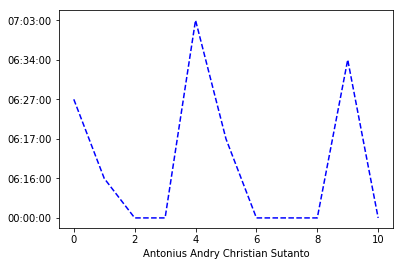

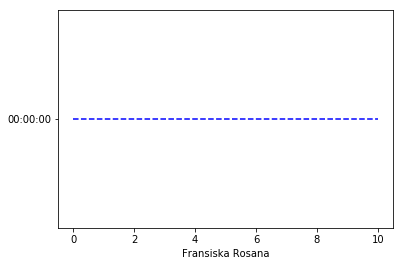

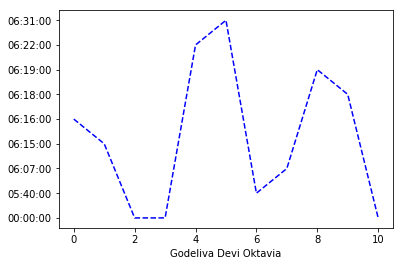

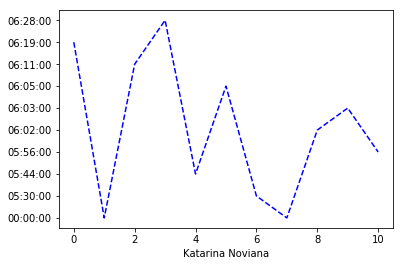

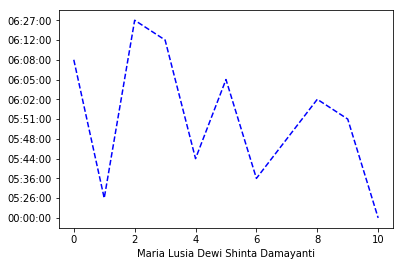

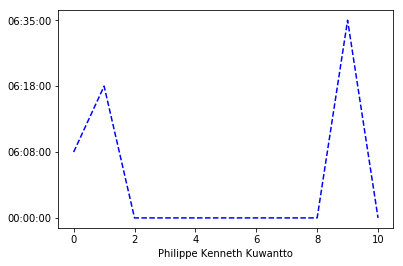

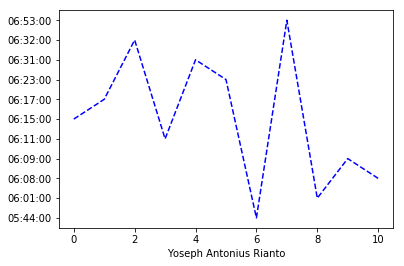

In [37]:
#tinggal di ganti angkanya lyd
kel = 5
kel_df = df[df['Kelompok'] == kel]
plot_by_group(kel_df)

In [30]:
def plot_attendences(group_of_students, group_name):
    plt.plot(
        CLASSES, group_of_students[3:], 'b--'
    )
    plt.xlabel(group_name)
    plt.show()

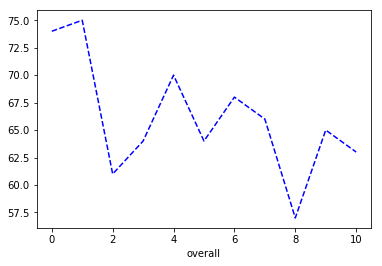

In [31]:
#Overall
plot_attendences(df[df[attendence_time_columns] > 0].count(), 'overall')

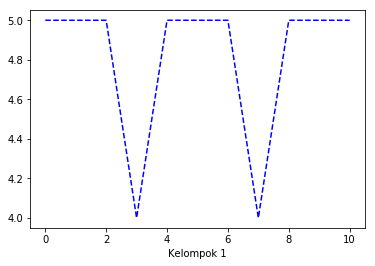

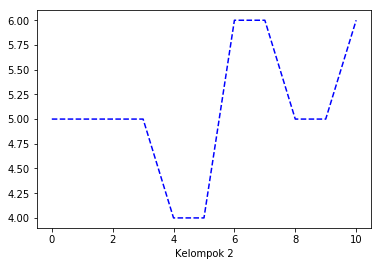

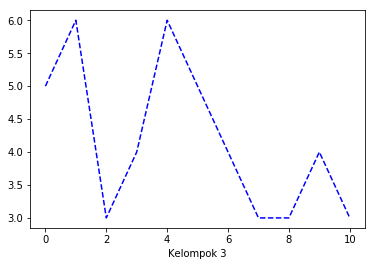

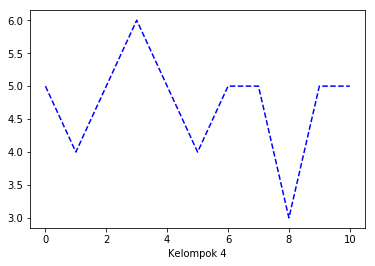

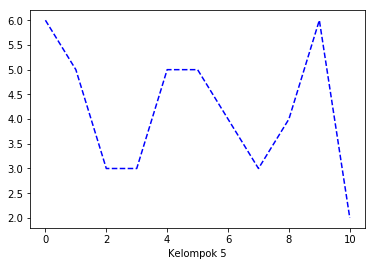

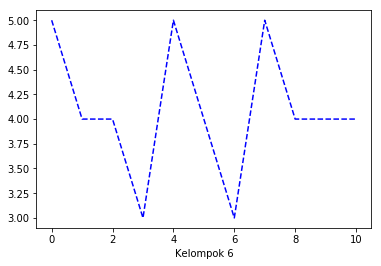

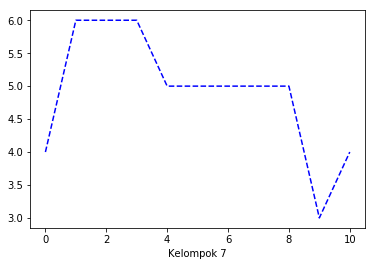

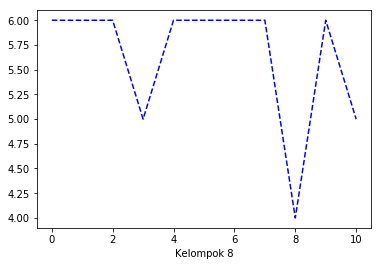

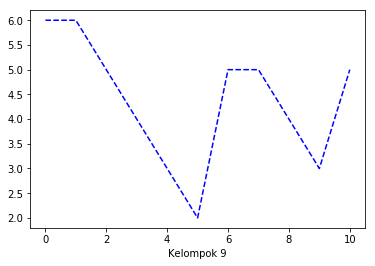

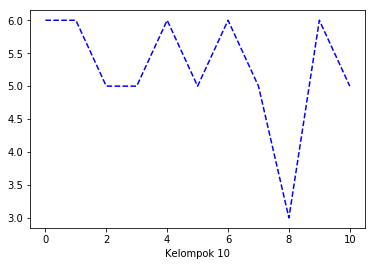

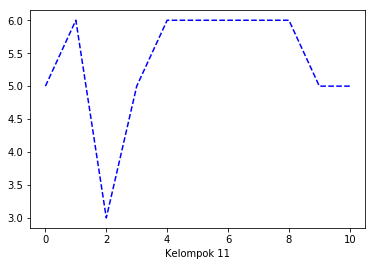

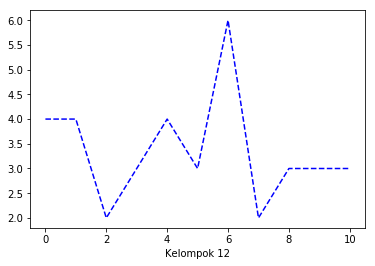

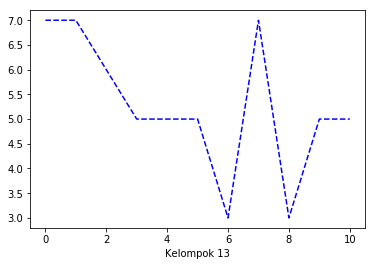

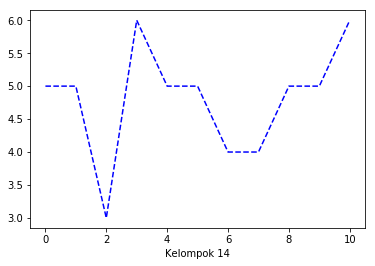

In [38]:
for i in range(1, 15):
    group_df = group_df = df[df['Kelompok'] == i]
    plot_attendences(group_df[group_df[attendence_time_columns] > 0].count(), 'Kelompok {}'.format(i))

In [39]:
df['Jumlah kehadiran'] = df[df[attendence_time_columns] > 0].count(axis=1)

In [40]:
attendes_group = [int(len(CLASSES) * x) for x in [1, 0.8, 0.5, 0.3]]
groups = []
unselected_df = df
for number_of_attends in attendes_group:
    selected_df = unselected_df[unselected_df['Jumlah kehadiran'] >= number_of_attends]
    unselected_df = unselected_df[unselected_df['Jumlah kehadiran'] < number_of_attends]
    groups.append(selected_df)

In [41]:
for group, number_of_attends in zip(groups, attendes_group):
    print('Jumlah yang datang lebih dari {} pertemuan: {}'.format(number_of_attends, group.count()[0]))

Jumlah yang datang lebih dari 11 pertemuan: 24
Jumlah yang datang lebih dari 8 pertemuan: 39
Jumlah yang datang lebih dari 5 pertemuan: 14
Jumlah yang datang lebih dari 3 pertemuan: 4
